In [8]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import SAM

import importlib
importlib.reload(SAM)

from dask import delayed

In [19]:
ids = ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2']
ids = ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f3', 'r6i1p1f3', 'r7i1p1f3', 'r8i1p1f2', 'r9i1p1f2', 'r10i1p1f2']

In [20]:
SAM_obvs = SAM.load_obvs('data/SAM_obvs.txt')
ts = SAM_obvs['time'].values
SAM_data = []
for i in ids:
    options = {'memberId' : i}
    SAM_data.append(SAM.retrieve_SAM(timeRange=slice(ts[0], ts[-1]), options=options))

In [21]:
SAM_data_filt = [SAM.BW_filter(data, 4, 1/30, 'time') for data in SAM_data]
SAM_obvs_filt = SAM.BW_filter(SAM_obvs, 4, 1/30, 'time')

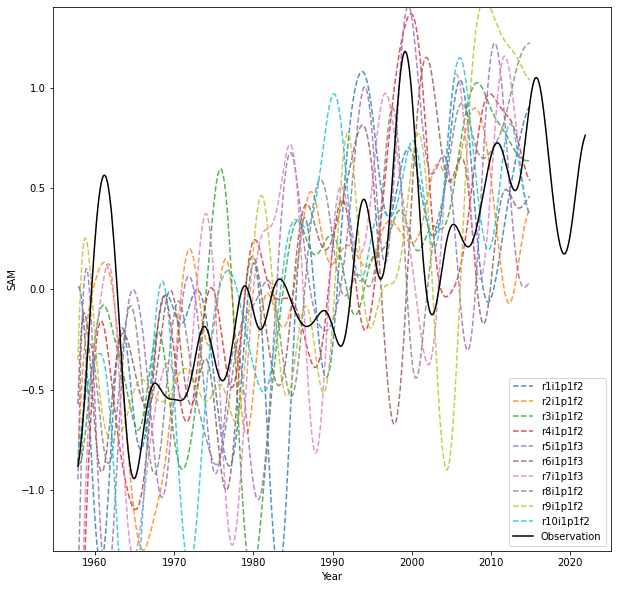

In [22]:
fig, ax = plt.subplots()

for (i, v) in enumerate(SAM_data_filt):
    plt.plot(v['time'][10:], v.values[10:], ls='--', label=ids[i], alpha=0.8)
plt.plot(SAM_obvs_filt['time'][10:], SAM_obvs_filt.values[10:], c='black', label='Observation')
fig.set_size_inches(10, 10)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('SAM')
#ax.set_xlim(np.datetime64('1959'), np.datetime64('2022'))
ax.set_ylim(-1.3, 1.4)
plt.savefig('figures/SAM-all', dpi=600, bbox_inches='tight')